# Задание 1.1 - Метод К-ближайших соседей (K-neariest neighbor classifier)

В первом задании вы реализуете один из простейших алгоритмов машинного обучения - классификатор на основе метода K-ближайших соседей.
Мы применим его к задачам
- бинарной классификации (то есть, только двум классам)
- многоклассовой классификации (то есть, нескольким классам)

Так как методу необходим гиперпараметр (hyperparameter) - количество соседей, мы выберем его на основе кросс-валидации (cross-validation).

Наша основная задача - научиться пользоваться numpy и представлять вычисления в векторном виде, а также ознакомиться с основными метриками, важными для задачи классификации.

Перед выполнением задания:
- запустите файл `download_data.sh`, чтобы скачать данные, которые мы будем использовать для тренировки
- установите все необходимые библиотеки, запустив `pip install -r requirements.txt` (если раньше не работали с `pip`, вам сюда - https://pip.pypa.io/en/stable/quickstart/)

Если вы раньше не работали с numpy, вам может помочь tutorial. Например этот:  
http://cs231n.github.io/python-numpy-tutorial/

In [11]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from dataset import load_svhn
from knn import KNN
from metrics import binary_classification_metrics, multiclass_accuracy

# Загрузим и визуализируем данные

В задании уже дана функция `load_svhn`, загружающая данные с диска. Она возвращает данные для тренировки и для тестирования как numpy arrays.

Мы будем использовать цифры из датасета Street View House Numbers (SVHN, http://ufldl.stanford.edu/housenumbers/), чтобы решать задачу хоть сколько-нибудь сложнее MNIST.

In [13]:
train_X, train_y, test_X, test_y = load_svhn("data", max_train=1000, max_test=100)

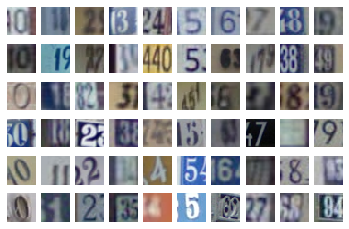

In [14]:
samples_per_class = 6  # Number of samples per class to visualize
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(6, 10, plot_index)
        image = train_X[train_y == class_index][example_index]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

# Сначала реализуем KNN для бинарной классификации

В качестве задачи бинарной классификации мы натренируем модель, которая будет отличать цифру 0 от цифры 9.

In [15]:
# First, let's prepare the labels and the source data

# Only select 0s and 9s
binary_train_mask = (train_y == 0) | (train_y == 9)
binary_train_X = train_X[binary_train_mask]
binary_train_y = train_y[binary_train_mask] == 0

binary_test_mask = (test_y == 0) | (test_y == 9)
binary_test_X = test_X[binary_test_mask]
binary_test_y = test_y[binary_test_mask] == 0

# Reshape to 1-dimensional array [num_samples, 32*32*3]
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)

In [16]:
binary_train_X.shape

(121, 3072)

In [17]:
binary_test_y.shape

(16,)

In [18]:
# Create the classifier and call fit to train the model
# KNN just remembers all the data
knn_classifier = KNN(k=1)
knn_classifier.fit(binary_train_X, binary_train_y)

## Пришло время написать код! 

Последовательно реализуйте функции `compute_distances_two_loops`, `compute_distances_one_loop` и `compute_distances_no_loops`
в файле `knn.py`.

Эти функции строят массив расстояний между всеми векторами в тестовом наборе и в тренировочном наборе.  
В результате они должны построить массив размера `(num_test, num_train)`, где координата `[i][j]` соотвествует расстоянию между i-м вектором в test (`test[i]`) и j-м вектором в train (`train[j]`).

**Обратите внимание** Для простоты реализации мы будем использовать в качестве расстояния меру L1 (ее еще называют [Manhattan distance](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2)).

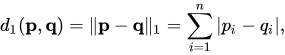

In [21]:
# TODO: implement compute_distances_two_loops in knn.py
dists = knn_classifier.compute_distances_two_loops(binary_test_X)

assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [41]:
# TODO: implement compute_distances_one_loop in knn.py
dists = knn_classifier.compute_distances_one_loop(binary_test_X)
print(dists[0])
print("calculated: ", dists[0, 10])
print ("required:", np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


(121, 3072)
(16, 3072)
121
[179952. 386833. 135249. 241602. 178033. 265134. 172488. 260224. 306160.
 317740. 205633. 199775.  81989. 155568. 306266. 232665. 251664. 314060.
 131897. 369146. 379197. 299894. 212661. 304557. 318798. 413931. 287801.
 150940. 203756. 376053. 371847. 287530. 192576. 363634. 403174. 142684.
 344588. 250476. 221266. 334548. 214209. 205272. 220377.  76624. 396764.
 149364. 280686. 262564. 344878.  99566. 289542. 259780. 313434. 217829.
 266470. 171050.  79464. 224472.  79685. 206564. 195442. 408625. 245766.
 232901. 270163. 192078. 373123. 308212. 280537. 213660. 133480. 217215.
 250428. 403997.  69783. 125292. 191514. 326446. 188398. 100027. 351849.
 250486. 284076. 141850. 115082. 139610. 345395. 363934. 286406. 361679.
 374734. 259448. 364185. 356324. 295217. 326220. 392658. 197057. 302508.
 298032. 325444. 143564. 311796. 215810. 141114. 121003. 241757. 108614.
 398187. 327580. 326303. 108908. 124981. 312695. 401672. 192821. 187059.
 110859. 333468. 226102.

In [46]:
# TODO: implement compute_distances_no_loops in knn.py
dists = knn_classifier.compute_distances_no_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


In [47]:
# Lets look at the performance difference
%timeit knn_classifier.compute_distances_two_loops(binary_test_X)
%timeit knn_classifier.compute_distances_one_loop(binary_test_X)
%timeit knn_classifier.compute_distances_no_loops(binary_test_X)

36.9 ms ± 3.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)
(16, 3072)
121
(121, 3072)

In [51]:
# TODO: implement predict_labels_binary in knn.py

prediction = knn_classifier.predict(binary_test_X)
prediction

[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[False]
[ True]
[ True]
[False]
[ True]
[ True]
[ True]
[ True]
[False]
[False]


array([ True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True, False, False])

In [49]:
# TODO: implement binary_classification_metrics in metrics.py
precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 1
Accuracy: 0.25, Precision:  nan, Recall: 0.00, F1:  nan


C:\Users\yudinev\Desktop\DL на пальцах\Задания\dlcourse_ai-master Mihanick\dlcourse_ai-master\assignments\assignment1\metrics.py:34: RuntimeWarning: invalid value encountered in long_scalars
  precision = true_positives / (true_positives + false_positives)


In [52]:
# Let's put everything together and run KNN with k=3 and see how we do
knn_classifier_3 = KNN(k=3)
knn_classifier_3.fit(binary_train_X, binary_train_y)
prediction = knn_classifier_3.predict(binary_test_X)
print(prediction)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier_3.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

[ True  True False]
[ True  True  True]
[False  True  True]
[ True  True  True]
[ True False  True]
[ True False  True]
[False False False]
[ True  True False]
[ True  True  True]
[False  True False]
[ True False False]
[ True  True False]
[ True  True  True]
[ True False  True]
[False False  True]
[False False  True]
[ True  True  True  True  True  True False  True  True False False  True
  True  True False False]
KNN with k = 3
Accuracy: 0.56, Precision: 0.73, Recall: 0.67, F1: 0.70


# Кросс-валидация (cross-validation)

Попробуем найти лучшее значение параметра k для алгоритма KNN! 

Для этого мы воспользуемся k-fold cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation). Мы разделим тренировочные данные на 5 фолдов (folds), и по очереди будем использовать каждый из них в качестве проверочных данных (validation data), а остальные -- в качестве тренировочных (training data).

В качестве финальной оценки эффективности k мы усредним значения F1 score на всех фолдах.
После этого мы просто выберем значение k с лучшим значением метрики.

*Бонус*: есть ли другие варианты агрегировать F1 score по всем фолдам? Напишите плюсы и минусы в клетке ниже.

In [57]:
# Find the best k using cross-validation based on F1 score
num_folds = 5
train_folds_X = []
train_folds_y = []


train_folds_X = np.array_split(binary_train_X, num_folds)
train_folds_y = np.array_split(binary_train_y, num_folds)

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y



k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_f1 = {}  # dict mapping k values to mean F1 scores (int -> float)
k_to_accuracy={}

for k in k_choices:
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for training
    # Perform training and produce F1 score metric on the validation dataset
    # Average F1 from all the folds and write it into k_to_f1

    accuracies =[]
    f1s = []
    
    for fold in range(num_folds):
        test_X_fold = train_folds_X[fold]
        test_y_fold = train_folds_y[fold]
        
        train_X_fold = np.empty_like(test_X_fold)
        train_y_fold = np.empty_like(test_y_fold)
        
        
        for rest_fold in range(num_folds):
            if (rest_fold == fold):
                continue
            # concatenate by rows
            train_X_fold = np.concatenate((train_X_fold, train_folds_X[rest_fold]))
            train_y_fold = np.concatenate((train_y_fold, train_folds_y[rest_fold]))
        
        knn_classifier = KNN(k=k)
        knn_classifier.fit(train_X_fold, train_y_fold)
        predict = knn_classifier.predict(test_X_fold)
        precision, recall, f1, accuracy = binary_classification_metrics(predict, test_y_fold)

        accuracies.append(accuracy)
        f1s.append(f1)
    
    k_to_f1[k] = np.mean(f1)
    k_to_accuracy[k] = np.mean(accuracies)

for k in sorted(k_to_f1):
    print('k = %d, acc = %f' % (k, k_to_accuracy[k]))
    
for k in sorted(k_to_f1):
    print('k = %d, f1 = %f' % (k, k_to_f1[k]))

k = 1, acc = 0.635333
k = 2, acc = 0.635333
k = 3, acc = 0.618667
k = 5, acc = 0.512000
k = 8, acc = 0.527333
k = 10, acc = 0.527000
k = 15, acc = 0.511333
k = 20, acc = 0.552000
k = 25, acc = 0.519333
k = 50, acc = 0.519000
k = 1, f1 = 0.785714
k = 2, f1 = 0.785714
k = 3, f1 = 0.787879
k = 5, f1 = 0.750000
k = 8, f1 = 0.727273
k = 10, f1 = 0.764706
k = 15, f1 = 0.742857
k = 20, f1 = 0.787879
k = 25, f1 = 0.705882
k = 50, f1 = 0.666667


### Проверим, как хорошо работает лучшее значение k на тестовых данных (test data)

In [58]:
# TODO Set the best k to the best value found by cross-validation
# https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
best_k = max(k_to_f1, key = k_to_f1.get)

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(binary_train_X, binary_train_y)
prediction = best_knn_classifier.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

Best KNN with k = 3
Accuracy: 0.56, Precision: 0.73, Recall: 0.67, F1: 0.70


# Многоклассовая классификация (multi-class classification)

Переходим к следующему этапу - классификации на каждую цифру.

In [59]:
# Now let's use all 10 classes
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

knn_classifier = KNN(k=1)
knn_classifier.fit(train_X, train_y)

In [63]:
# TODO: Implement predict_labels_multiclass
predict = knn_classifier.predict(test_X)

In [64]:
# TODO: Implement multiclass_accuracy
accuracy = multiclass_accuracy(predict, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.21


Снова кросс-валидация. Теперь нашей основной метрикой стала точность (accuracy), и ее мы тоже будем усреднять по всем фолдам.

In [65]:
# Find the best k using cross-validation based on accuracy
num_folds = 5
train_folds_X = []
train_folds_y = []

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y

train_folds_X = np.array_split(train_X, num_folds)
train_folds_y = np.array_split(train_y, num_folds)
    
k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_accuracy = {}

for k in k_choices:
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for validation
    # Perform training and produce accuracy metric on the validation dataset
    # Average accuracy from all the folds and write it into k_to_accuracy
    
    # print(np.sum(train_folds_X))
    
    for fold in range(num_folds):
        test_X_fold = train_folds_X[fold]
        test_y_fold = train_folds_y[fold]
        # print(np.sum(test_X_fold))
        
        train_X_fold = np.empty_like(test_X_fold)
        train_y_fold = np.empty_like(test_y_fold)
        
        accuracies = []
        
        for rest_fold in range(num_folds):
            if (rest_fold == fold):
                continue
            # concatenate by rows
            train_X_fold = np.concatenate((train_X_fold, train_folds_X[rest_fold]))
            train_y_fold = np.concatenate((train_y_fold, train_folds_y[rest_fold]))
        # print(np.sum(train_X_fold))
        
        knn_classifier = KNN(k=k)
        knn_classifier.fit(train_X_fold, train_y_fold)
        predict = knn_classifier.predict(test_X_fold)
        accuracy = multiclass_accuracy(predict, test_y_fold)
        accuracies.append(accuracy)
        
        # print (k, accuracy)
     
    k_to_accuracy[k] = np.mean(accuracies)
    print(accuracies, k_to_accuracy[k])
    
for k in sorted(k_to_accuracy):
    print('k = %d, accuracy = %f' % (k, k_to_accuracy[k]))

[0.28] 0.28


KeyboardInterrupt: 

### Финальный тест - классификация на 10 классов на тестовой выборке (test data)

Если все реализовано правильно, вы должны увидеть точность не менее **0.2**.

In [ ]:
# TODO Set the best k as a best from computed
best_k =max(k_to_accuracy, key = k_to_accuracy.get)

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(train_X, train_y)
prediction = best_knn_classifier.predict(test_X)

# Accuracy should be around 20%!
accuracy = multiclass_accuracy(prediction, test_y)
print("Accuracy: %4.2f" % accuracy)